# Notebook to plot power spectra and CF for the halos and cdm

## Loading packages

In [19]:
import numpy as np
# import MAS_library as MASL
import plotting_library as PL
from pylab import *
from matplotlib.colors import LogNorm
import matplotlib as plt
import pandas as pd
import h5py as h5
import matplotlib.pyplot as plt
text_size=26
fig_size_x=24
fig_size_y=14
from collections import defaultdict

import seaborn as sns
Colors = sns.color_palette("colorblind", 16).as_hex()
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import interpolate

## Loading power and CF data

In [27]:
directory = "/Users/farbod/Dropbox/Projects/Doppler_RSD/Data/Powerpsectra_correlationfunction_particles_Pylians/"
directory_halo = "/Users/farbod/Dropbox/Projects/Doppler_RSD/Data/Power_spectra_correlation_function_RSD_noRSD_Halos/"
directory_power = "/Users/farbod/Dropbox/Projects/Doppler_RSD//Data/Doppler_project_PowerSpectra_data//"
directory_lightcone = "/Users/farbod/Dropbox/Projects/Doppler_RSD//Data/Doppler_project_PowerSpectra_data///"
directory = "/Users/farbod/Dropbox/Projects/Doppler_RSD/Data/Powerpsectra_correlationfunction_particles_Pylians/"

# lcdm_gev = np.load(directory +"/no_RSD/pk3D_gevolution_boxsize_4032_ngrid_4608_lcdm_05062020_z_0.1.npy")
# cs2_e7 = np.load(directory +"/no_RSD/pk3D_gevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em7_05062020_z_0.1.npy")



lcdm_gev = np.loadtxt(directory_lightcone +"/gevolution_boxsize_4032_ngrid_4608_lcdm_05062020//output//lcdm_pk015_deltacdm.dat")
cs2_e7 =  np.loadtxt(directory_lightcone +"/gevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em7_05062020///output/w0d9_cs2_em7_gevolution_pk015_deltacdm.dat")
cs2_1 =  np.loadtxt(directory_lightcone +"/gevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_1_05062020////output/w0d9_cs1_gevolution_pk015_deltacdm.dat")

#gevolution powerspectra
z_gev= ["100", "50", "30", "20", "10", "6", "4", "3", "2.5", "2", "1.5", "1", "0.75", "0.5", "0.25", "0.1", "0"]

# for j in range(5):
#     for i in range(np.shape(z_gev)[0]):

#         pow_gev['gev_lcdm']['z='+str(z_gev[i])]=np.loadtxt(directory_power+files[0]+"/output/lcdm_pk"+str(i).zfill(3)+"_deltacdm.dat");
# #         pow_gev['gev_em0']['z='+str(z_gev[i])]=np.loadtxt(directory_power+files[1]+"/output/w0d9_cs1_gevolution_pk"+str(i).zfill(3)+"_deltacdm.dat");
#         pow_gev['gev_em7']['z='+str(z_gev[i])]=np.loadtxt(directory_power+files[2]+"/output/w0d9_cs2_em7_gevolution_pk"+str(i).zfill(3)+"_deltacdm.dat");
# #     for i in range(np.shape(z_kev)[0]):   
# #         pow_gev['kev_em4']['z='+str(z_kev[i])]=np.loadtxt(directory_power+files[3]+"/output/kess_cs2e4_4032box_4608_pk"+str(i).zfill(3)+"_deltacdm.dat");
# #         pow_gev['kev_em7']['z='+str(z_kev[i])]=np.loadtxt(directory_power+files[4]+"/output/kess_cs2e7_4032box_4608_pk"+str(i).zfill(3)+"_deltacdm.dat");

        
directory_class = "/Users/farbod/Dropbox/Projects/Doppler_RSD/Data//CLASS_powers/"

files_list_class = ['lcdm','cs2_1','cs2_e4','cs2_e7'];
redshifts_class = [100, 50, 30, 10, 4, 3, 2.5, 2, 1.5, 1, 0.75, 0.5, 0.25, 0.1, 0];

lcdm_class = np.loadtxt(directory_class+"/lcdm/class_z15_pk.dat")

cs2_e7_class = np.loadtxt(directory_class+"/cs2_e7//class_z15_pk_cb_nl.dat")
cs2_e1_class = np.loadtxt(directory_class+"/cs2_1///class_z15_pk_cb_nl.dat")



# # CLASS data loading:
# for j in range(4):
    
#     class_data['Bg'][files_list_class[j]]=np.loadtxt(directory_class+files_list_class[j]+"/background.dat");
#     for i in range(np.shape(redshifts_class)[0]): # redshift
#         class_data['transfer'][files_list_class[j]]['z='+str(redshifts_class[i])]=np.loadtxt(directory_class+files_list_class[j]+"/z"+str(i+1)+"_tk.dat");
#         class_data['power_cb_lin'][files_list_class[j]]['z='+str(redshifts_class[i])]=np.loadtxt(directory_class+files_list_class[j]+"/z"+str(i+1)+"_pk_cb.dat");
#         class_data['power_cb_nl'][files_list_class[j]]['z='+str(redshifts_class[i])]=np.loadtxt(directory_class+files_list_class[j]+"/z"+str(i+1)+"_pk_cb_nl.dat");
#         class_data['power_m_lin'][files_list_class[j]]['z='+str(redshifts_class[i])]=np.loadtxt(directory_class+files_list_class[j]+"/z"+str(i+1)+"_pk.dat");
#         class_data['power_m_nl'][files_list_class[j]]['z='+str(redshifts_class[i])]=np.loadtxt(directory_class+files_list_class[j]+"/z"+str(i+1)+"_pk_nl.dat");

# # CLASS conversion :
# k_pivot = 0.05
# A_s = 2.1e-9
# n_s = 0.96
# h = 0.67
# k_class = class_data['transfer'][files_list_class[0]]["z=0"][:,0]
# conversion = A_s*(k_class*h/k_pivot)**(n_s-1)*(2.*np.pi**2/(k_class**3));



No handles with labels found to put in legend.


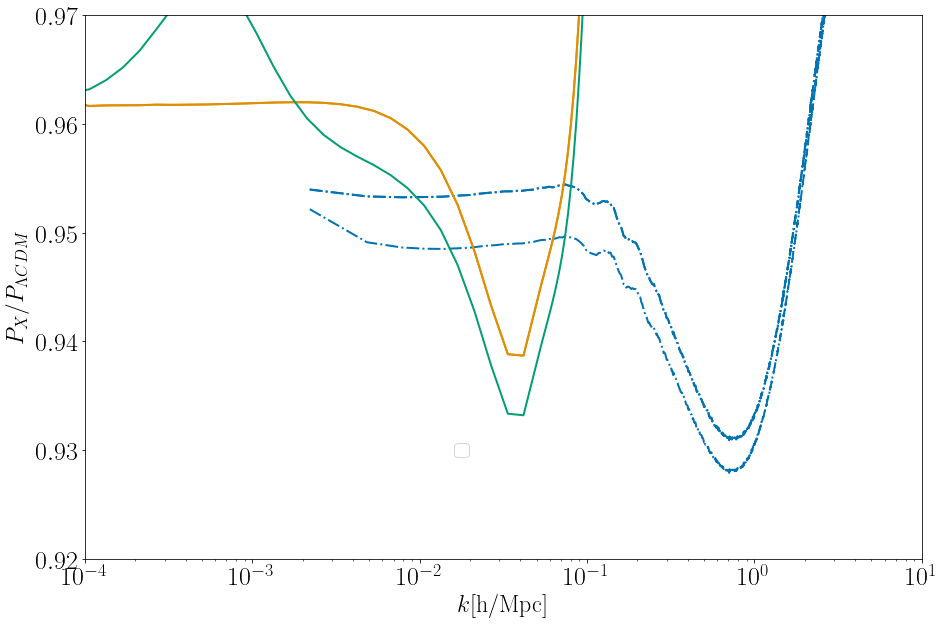

In [28]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(15,10),nrows=1, ncols=1)
plt.subplots_adjust(hspace=0.01)


kind = 'cdm'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','kev_em4','gev_em7','kev_em7'];

files2_lightcone = ['small_lcdm','small_em4','small_em7'];


decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ", "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$)",
          "$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]

files_list_class = ['lcdm','cs2_1','cs2_e4','cs2_e7'];

z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];


l=0
axs.plot(cs2_e7[:,0],cs2_e7[:,1]/lcdm_gev[:,1],"-.",color =Colors[l], lw=2)
axs.plot(cs2_e7[:,0],cs2_e7[:,1]/lcdm_gev[:,1],"-.",color =Colors[l], lw=2)
axs.plot(cs2_e7[:,0],cs2_1[:,1]/lcdm_gev[:,1],"-.",color =Colors[l], lw=2)


axs.plot(cs2_e7_class[:,0],cs2_e7_class[:,1]/lcdm_class[:,1],"-",color =Colors[l+1], lw=2)
axs.plot(cs2_e7_class[:,0],cs2_e7_class[:,1]/lcdm_class[:,1],"-",color =Colors[l+1], lw=2)
axs.plot(cs2_e1_class[:,0],cs2_e1_class[:,1]/lcdm_class[:,1],"-",color =Colors[l+2], lw=2)


axs.set_ylabel(r'$P_X/P_{\Lambda CDM}$',fontsize=24)
axs.set_xlabel('$k$[h/Mpc]',fontsize=24)
axs.set_xscale('log')
# plt.yscale('symlog')
axs.set_ylim(0.92,0.97)
axs.set_xlim(1.e-4,10)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1])  
axs.legend(fontsize=18,bbox_to_anchor=[0.45,0.2],loc="center")
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


No handles with labels found to put in legend.


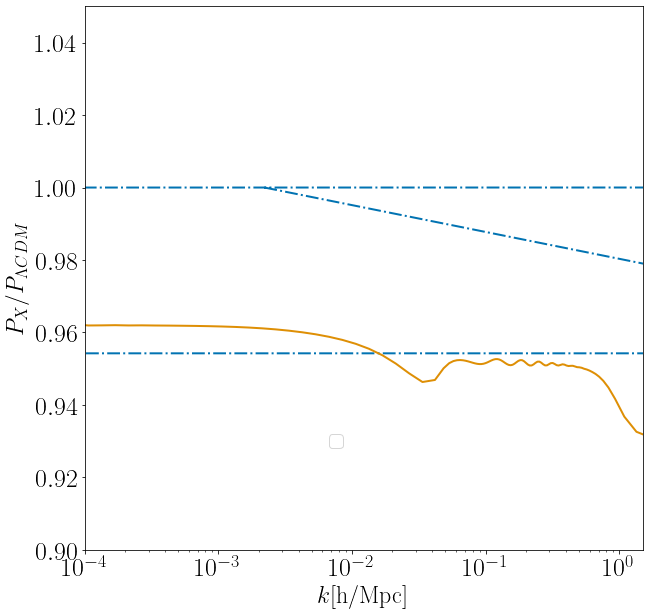

In [15]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(10,10),nrows=1, ncols=1)
plt.subplots_adjust(hspace=0.01)


kind = 'cdm'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','kev_em4','gev_em7','kev_em7'];

files2_lightcone = ['small_lcdm','small_em4','small_em7'];


decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ", "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$)",
          "$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]

files_list_class = ['lcdm','cs2_1','cs2_e4','cs2_e7'];

z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];


l=0
axs.plot(cs2_e7[:,0],cs2_e7[:,1]/lcdm_gev[:,1],"-.",color =Colors[l], lw=2)

axs.plot(cs2_e7_class[:,0],cs2_e7_class[:,1]/lcdm_class[:,1],"-",color =Colors[l+1], lw=2)


axs.set_ylabel(r'$P_X/P_{\Lambda CDM}$',fontsize=24)
axs.set_xlabel('$k$[h/Mpc]',fontsize=24)
axs.set_xscale('log')
# plt.yscale('symlog')
axs.set_ylim(0.9,1.05)
axs.set_xlim(1.e-4,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1])  
axs.legend(fontsize=18,bbox_to_anchor=[0.45,0.2],loc="center")
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


In [11]:
cs2_e7[:,1]/lcdm_gev[:,1]

array([1.        , 0.9542446 , 0.95427388, 0.95188541, 0.99997882,
       1.        ])

# Tests

In [32]:
data.keys()
class_data.keys()
class_data['Bg'].keys()
class_data['Bg']['lcdm'];
class_data['transfer']['lcdm'].keys()
class_data['transfer']['lcdm']['z=0'];

# Power test, Pylians test

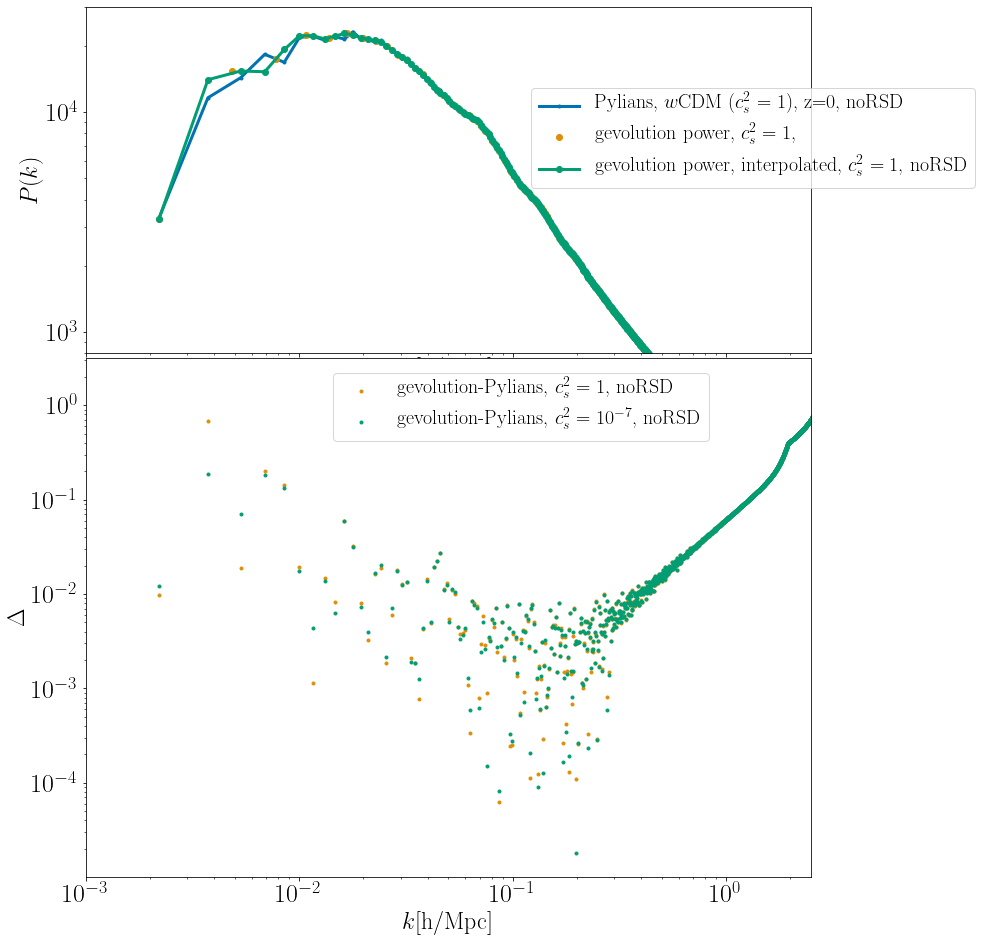

In [33]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,1.5]})
plt.subplots_adjust(hspace=0.01)

kind = 'cdm'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($c_s^2=1$), ","$w$CDM-gev ($c_s^2=10^{-7}$), ",
          "$w$CDM ($c_s^2=10^{-4}$), ","$w$CDM ($c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [1]: # file
    for j in [0]: # Redshifts
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
        axs[0].loglog(k_w,pk,".-",color =Colors[l], lw=3,label="Pylians, "+decrip[i]+z[j]+", "+RSD)
        l=l+1

k_pylians =data[kind][RSD][file[0]]['pow'][z[0]][0,:] 
k_w = pow_gev['gev_em0']['z=0'][:,0];
pk = pow_gev['gev_em0']['z=0'][:,1];
# interp_pow=InterpolatedUnivariateSpline(k_w,pk,k=5)
# pk = interp_pow(k_pylians);
# k_w =k_pylians
axs[0].loglog(k_w,pk*(2.*np.pi**2)/(k_w**3),"o",color =Colors[l], lw=3,label="gevolution power, $c_s^2=1$, ")

k_pylians =data[kind][RSD][file[0]]['pow'][z[0]][0,:] 
k_w = pow_gev['gev_em0']['z=0'][:,0];
pk = pow_gev['gev_em0']['z=0'][:,1];
interp_pow=InterpolatedUnivariateSpline(k_w,pk,k=2)
pk = interp_pow(k_pylians);
k_w =k_pylians
axs[0].loglog(k_w,pk*(2.*np.pi**2)/(k_w**3),"-o",color =Colors[l+1], lw=3,label="gevolution power, interpolated, $c_s^2=1$, "+RSD)

axs[0].set_ylabel('$P(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_ylim(8.e2,3.e4)
axs[0].set_xlim(1.e-3,1)
axs[0].legend(fontsize=20,bbox_to_anchor=(0.6,0.45))

# Rel diff
kind = 'cdm'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($c_s^2=1$), ","$w$CDM-gev ($c_s^2=10^{-7}$), ",
          "$w$CDM ($c_s^2=10^{-4}$), ","$w$CDM ($c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

k_pylians =data[kind][RSD][file[0]]['pow'][z[0]][0,:] 
k_w = pow_gev['gev_em0']['z=0'][:,0];
pk = pow_gev['gev_em0']['z=0'][:,1];
interp_pow=InterpolatedUnivariateSpline(k_w,pk,k=3)
pk_gev = interp_pow(k_pylians)*(2.*np.pi**2)/(k_pylians**3);
pk_pylians = data[kind][RSD][file[1]]['pow'][z[0]][1,:]
axs[1].plot(k_pylians,np.abs(pk_gev-pk_pylians)/(0.5*(pk_pylians+pk_gev)),".",color =Colors[l], lw=3,label="gevolution-Pylians, $c_s^2=1$, "+RSD)


k_pylians =data[kind][RSD][file[4]]['pow'][z[0]][0,:] 
k_w = pow_gev['kev_em7']['z=0'][:,0];
pk = pow_gev['kev_em7']['z=0'][:,1];
interp_pow=InterpolatedUnivariateSpline(k_w,pk,k=2)
pk_gev = interp_pow(k_pylians)*(2.*np.pi**2)/(k_pylians**3);
pk_pylians = data[kind][RSD][file[4]]['pow'][z[0]][1,:]
axs[1].plot(k_pylians,np.abs(pk_gev-pk_pylians)/(0.5* (pk_pylians+pk_gev)),".",color =Colors[l+1], lw=3,label="gevolution-Pylians, $c_s^2=10^{-7}$, "+RSD)



axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
plt.yscale('log')
# axs[1].set_ylim(-0.2,0.3)
axs[1].set_xlim(1.e-3,2.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=20,bbox_to_anchor=(0.6,0.82))
# X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)

# CLASS different power HM, linear vs gevolution

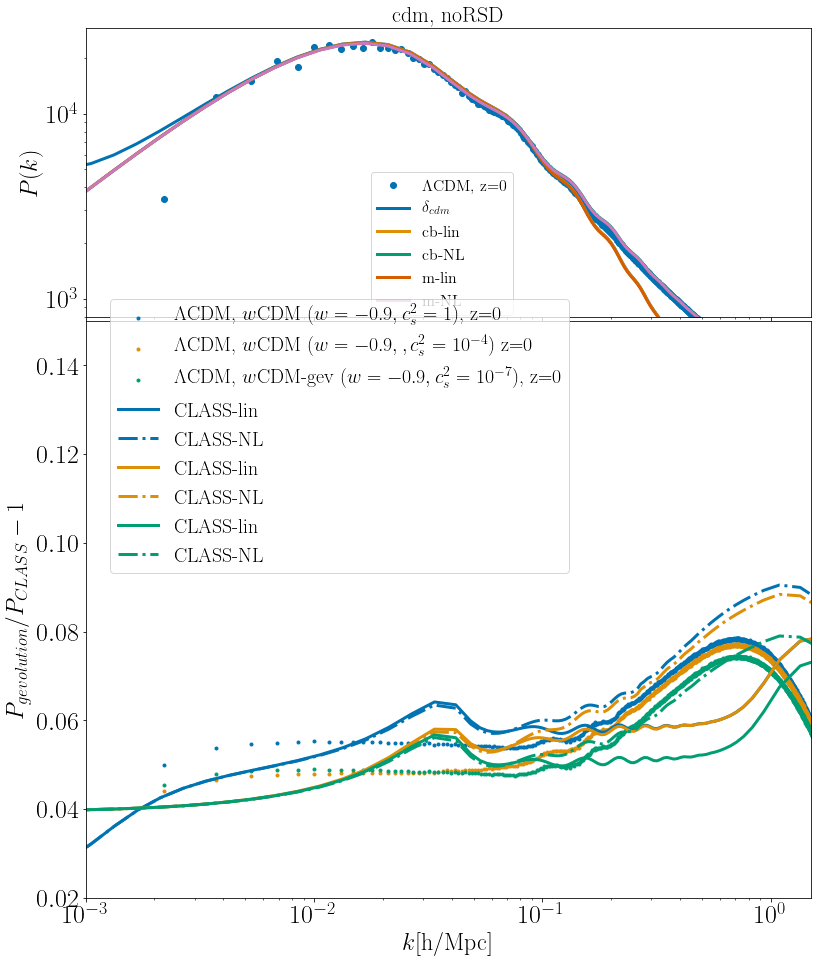

In [34]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0.5,1]})
plt.subplots_adjust(hspace=0.01)


kind = 'cdm'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','kev_em4','gev_em7','kev_em7'];

files2_lightcone = ['small_lcdm','small_em4','small_em7'];


decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ", "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$)",
          "$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]

files_list_class = ['lcdm','cs2_1','cs2_e4','cs2_e7'];

z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0]: # file
    for j in [0]: # Redshifts
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
        axs[0].loglog(k_w,pk,"o",color =Colors[l], lw=3,label=decrip[i]+z[j])
        
        k_class = class_data['transfer'][files_list_class[i]][z[j]][:,0]
        pk_class = class_data['transfer'][files_list_class[i]][z[j]][:,3]
        axs[0].loglog(k_class, pk_class**2 *conversion ,"-",color =Colors[l], lw=3,label=r"$\delta_{cdm}$")
        
        k_class = class_data['power_cb_lin'][files_list_class[i]][z[j]][:,0]
        pk_class = class_data['power_cb_lin'][files_list_class[i]][z[j]][:,1]
        axs[0].loglog(k_class, pk_class ,"-",color =Colors[l+1], lw=3,label="cb-lin")
        
        k_class = class_data['power_cb_nl'][files_list_class[i]][z[j]][:,0]
        pk_class = class_data['power_cb_nl'][files_list_class[i]][z[j]][:,1]
        axs[0].loglog(k_class, pk_class ,"-",color =Colors[l+2], lw=3,label="cb-NL")
        
        k_class = class_data['power_m_lin'][files_list_class[i]][z[j]][:,0]
        pk_class = class_data['power_m_lin'][files_list_class[i]][z[j]][:,1]
        axs[0].loglog(k_class, pk_class ,"-",color =Colors[l+3], lw=3,label="m-lin")
        
        k_class = class_data['power_m_nl'][files_list_class[i]][z[j]][:,0]
        pk_class = class_data['power_m_nl'][files_list_class[i]][z[j]][:,1]
        axs[0].loglog(k_class, pk_class ,"-",color =Colors[l+4], lw=3,label="m-NL")
        l=l+1

axs[0].set_ylabel('$P(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
# plt.yscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
axs[0].set_ylim(8.e2,2.9*1.e4)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=16,bbox_to_anchor=(0.60,0.53))
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:



l=0

l=0
for num1 in [1,2,3]: # file 1
    for num2 in [0]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [k1,pk1]=data[kind][RSD][file[num1]]['pow'][z[j]][[0,1],:]
                [k2,pk2]=data[kind][RSD][file[num2]]['pow'][z[j]][[0,1],:]
                axs[1].plot(k1,(pk2-pk1)/pk1,".",color =Colors[l], lw=2,label=decrip[num2]+decrip[num1]+" "+z[j])
                l=l+1
l=0
for num1 in [1,2,3]: # file 1
    for num2 in [0]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):

#                 k1 = class_data['transfer'][files_list_class[num1]][z[j]][:,0]
#                 pk1 = class_data['transfer'][files_list_class[num1]][z[j]][:,3]**2
#                 pk2 = class_data['transfer'][files_list_class[num2]][z[j]][:,3]**2
#                 axs[1].plot(k1,(pk2-pk1)/pk1,"-",color =Colors[l], lw=3,label="$\delta_{cdm}$")
#                 l=l+1;
                
#                 k1 = class_data['power_cb_lin'][files_list_class[num1]][z[j]][:,0]
#                 pk1 = class_data['power_cb_lin'][files_list_class[num1]][z[j]][:,1]
#                 pk2 = class_data['power_cb_lin'][files_list_class[num2]][z[j]][:,1]
#                 axs[1].plot(k1,(pk2-pk1)/pk1,"-.",color =Colors[l], lw=3,label="cb-lin")
#                 l=l+1;
                
#                 k1 = class_data['power_cb_nl'][files_list_class[num1]][z[j]][:,0]
#                 pk1 = class_data['power_cb_nl'][files_list_class[num1]][z[j]][:,1]
#                 pk2 = class_data['power_cb_nl'][files_list_class[num2]][z[j]][:,1]
#                 axs[1].plot(k1,(pk2-pk1)/pk1,"-.",color =Colors[l], lw=3,label="cb-nl")
#                 l=l+1;
                
                                
                k1 = class_data['power_m_lin'][files_list_class[num1]][z[j]][:,0]
                pk1 = class_data['power_m_lin'][files_list_class[num1]][z[j]][:,1]
                pk2 = class_data['power_m_lin'][files_list_class[num2]][z[j]][:,1]
                axs[1].plot(k1,(pk2-pk1)/pk1,"-",color =Colors[l], lw=3,label="CLASS-lin")
#                 l=l+1;

                k1 = class_data['power_m_nl'][files_list_class[num1]][z[j]][:,0]
                pk1 = class_data['power_m_nl'][files_list_class[num1]][z[j]][:,1]
                pk2 = class_data['power_m_nl'][files_list_class[num2]][z[j]][:,1]
                axs[1].plot(k1,(pk2-pk1)/pk1,"-.",color =Colors[l], lw=3,label="CLASS-NL")
                l=l+1;
                

axs[1].set_ylabel(r'${P_{gevolution} }/{P_{CLASS} }-1$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(0.02,0.15)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1])  
axs[1].legend(fontsize=20,bbox_to_anchor=[0.35,0.8],loc="center")
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Relative difference comparison

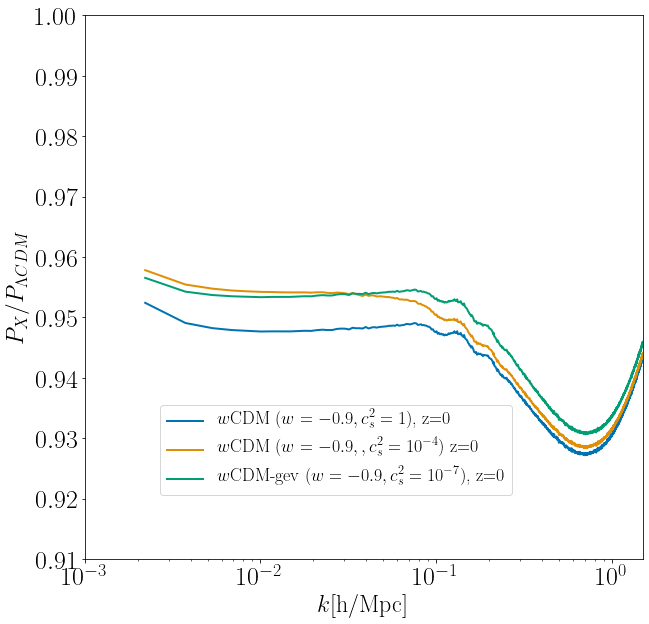

In [26]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(10,10),nrows=1, ncols=1)
plt.subplots_adjust(hspace=0.01)


kind = 'cdm'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','kev_em4','gev_em7','kev_em7'];

files2_lightcone = ['small_lcdm','small_em4','small_em7'];


decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ", "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$)",
          "$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]

files_list_class = ['lcdm','cs2_1','cs2_e4','cs2_e7'];

z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];


l=0

l=0
for num1 in [1,2,3]: # file 1
    for num2 in [0]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [k1,pk1]=data[kind][RSD][file[num1]]['pow'][z[j]][[0,1],:]
                [k2,pk2]=data[kind][RSD][file[num2]]['pow'][z[j]][[0,1],:]
                axs.plot(k1,pk1/pk2,"-",color =Colors[l], lw=2,label=decrip[num1]+" "+z[j])
                l=l+1
# l=0
# for num1 in [1,2,3]: # file 1
#     for num2 in [0]: # file2
#         for j in [1]: # Redshifts
#             if(num1!=num2):
             
#                 k1 = class_data['power_m_lin'][files_list_class[num1]][z[j]][:,0]
#                 pk1 = class_data['power_m_lin'][files_list_class[num1]][z[j]][:,1]
#                 pk2 = class_data['power_m_lin'][files_list_class[num2]][z[j]][:,1]
#                 axs.plot(k1,pk1/pk2,"-",color =Colors[l], lw=3,label="CLASS-lin")
#                 l=l+1;

#                 k1 = class_data['power_m_nl'][files_list_class[num1]][z[j]][:,0]
#                 pk1 = class_data['power_m_nl'][files_list_class[num1]][z[j]][:,1]
#                 pk2 = class_data['power_m_nl'][files_list_class[num2]][z[j]][:,1]
#                 axs.plot(k1,pk2/pk1,"-.",color =Colors[l], lw=3,label="CLASS-NL")
#                 l=l+1;
                
axs.set_ylabel(r'$P_X/P_{\Lambda CDM}$',fontsize=24)
axs.set_xlabel('$k$[h/Mpc]',fontsize=24)
axs.set_xscale('log')
# plt.yscale('symlog')
axs.set_ylim(0.91,1.)
axs.set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1])  
axs.legend(fontsize=18,bbox_to_anchor=[0.45,0.2],loc="center")
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# CLASS vs gevolution

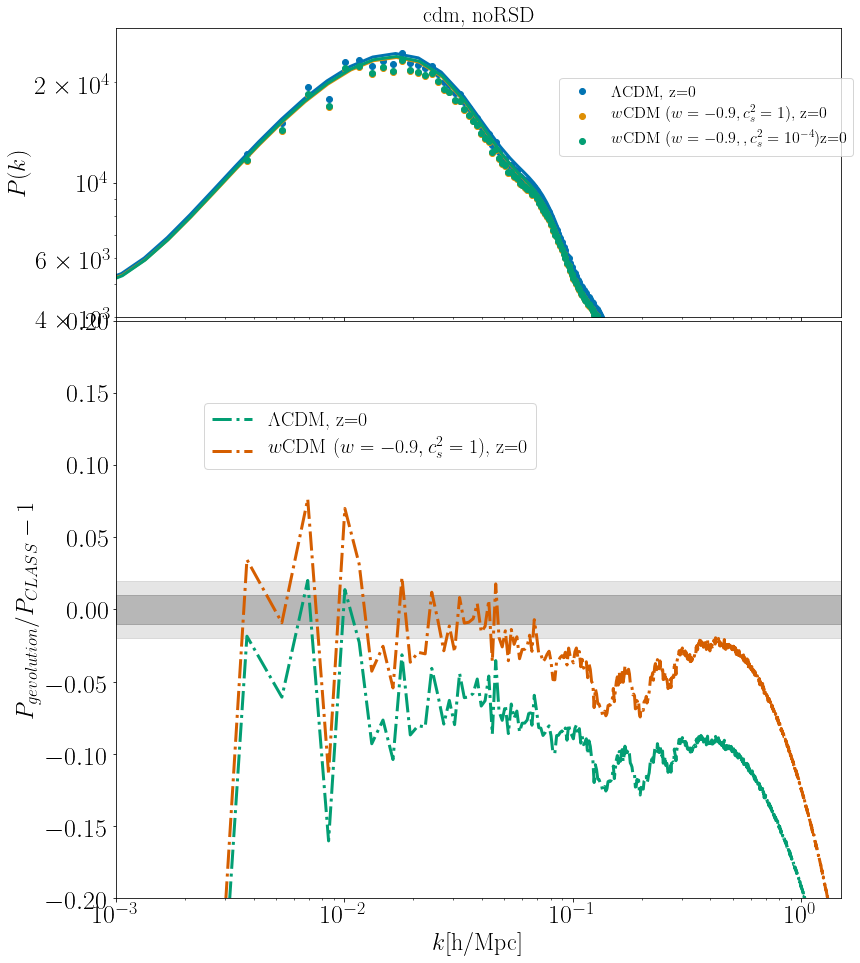

In [194]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0.5,1]})
plt.subplots_adjust(hspace=0.01)


kind = 'cdm'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','kev_em4','gev_em7','kev_em7'];

files2_lightcone = ['small_lcdm','small_em4','small_em7'];


decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ", "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$)",
          "$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]

files_list_class = ['lcdm','cs2_1','cs2_e4','cs2_e7'];

z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1,2]: # file
    for j in [0]: # Redshifts
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
        axs[0].loglog(k_w,pk,"o",color =Colors[l], lw=3,label=decrip[i]+z[j])
        
        k_class = class_data['transfer'][files_list_class[i]][z[j]][:,0]
        pk_class = class_data['transfer'][files_list_class[i]][z[j]][:,3]
        axs[0].loglog(k_class, pk_class**2 *conversion ,"-",color =Colors[l], lw=3)
        l=l+1

axs[0].set_ylabel('$P(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
# plt.yscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
axs[0].set_ylim(4.e3,2.9*1.e4)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=16,bbox_to_anchor=(0.60,0.53))
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:



l=0
for num1 in [0,1]: # file 1
    for j in [0]: # Redshifts
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
        
        k1 = class_data['power_cb_nl'][files_list_class[num1]][z[j]][:,0]
        pk1 = class_data['power_cb_nl'][files_list_class[num1]][z[j]][:,1]
#         k1 = class_data['transfer'][files_list_class[num1]][z[j]][:,0]
#         pk1 = class_data['transfer'][files_list_class[num1]][z[j]][:,3]**2*conversion
        interp_pow=InterpolatedUnivariateSpline(k1,pk1,k=2)
        # CLASS interpolation
        pk_class = interp_pow(k_w)

        axs[1].plot(k_w,(pk-pk_class)/pk_class,"-.",color =Colors[l+2], lw=3,label=decrip[num1]+" "+z[j])
        l=l+1


axs[1].set_ylabel(r'${P_{gevolution} }/{P_{CLASS} }-1$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(-0.2,0.2)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1])  
axs[1].legend(fontsize=20,bbox_to_anchor=[0.35,0.8],loc="center")
X=np.arange(0.001,20,1)
axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# gevolution Sanity checks

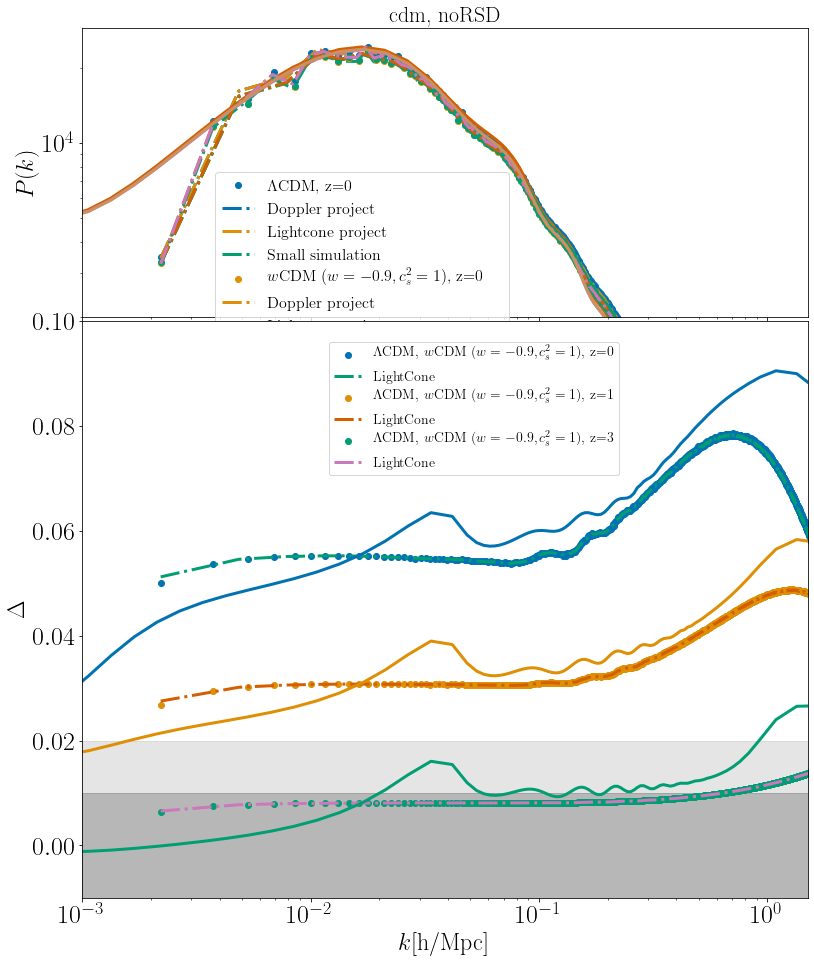

In [184]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'cdm'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','kev_em4','gev_em7','kev_em7'];

files2_lightcone = ['small_lcdm','small_em4','small_em7'];


decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ", "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$)",
          "$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]

files_list_class = ['lcdm','cs2_1','cs2_e4','cs2_e7'];

z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1,2]: # file
    for j in [0]: # Redshifts
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
        axs[0].loglog(k_w,pk,"o",color =Colors[l], lw=3,label=decrip[i]+z[j])
        
        k_g=pow_gev[file[i]][z[j]][:,0]
        pk_g = pow_gev[file[i]][z[j]][:,1]
        axs[0].loglog(k_g,pk_g*(2.*np.pi**2)/(k_g**3),"-.",color =Colors[l], lw=3,label="Doppler project")
        
        k_g=pow_lightcone[file[i]][z[j]][:,0]
        pk_g = pow_lightcone[file[i]][z[j]][:,1]
        axs[0].loglog(k_g,pk_g*(2.*np.pi**2)/(k_g**3),"-.",color =Colors[l+1], lw=3,label="Lightcone project")
        
        k_g=pow_lightcone[files2_lightcone[i]][z[j]][:,0]
        pk_g = pow_lightcone[files2_lightcone[i]][z[j]][:,1]
        axs[0].loglog(k_g,pk_g*(2.*np.pi**2)/(k_g**3),"-.",color =Colors[l+2], lw=3,label="Small simulation")
        
        k_class = class_data['transfer'][files_list_class[i]][z[j]][:,0]
        pk_class = class_data['transfer'][files_list_class[i]][z[j]][:,3]
        axs[0].loglog(k_class, pk_class**2 *conversion ,"-",color =Colors[l+3], lw=3)
        l=l+1

axs[0].set_ylabel('$P(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
# plt.yscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
axs[0].set_ylim(2.e3,2.9*1.e4)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=16,bbox_to_anchor=(0.60,0.53))
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

l=0
for num1 in [1]: # file 1
    for num2 in [0]: # file2
        for j in [0,2,4]: # Redshifts
            if(num1!=num2):
                [k1,pk1]=data[kind][RSD][file[num1]]['pow'][z[j]][[0,1],:]
                [k2,pk2]=data[kind][RSD][file[num2]]['pow'][z[j]][[0,1],:]
                axs[1].plot(k1,(pk2-pk1)/pk1,"o",color =Colors[l], lw=2,label=decrip[num2]+decrip[num1]+" "+z[j])
                
#                 k_g1=pow_gev[file[num1]][z[j]][:,0]
#                 pk_g1 = pow_gev[file[num1]][z[j]][:,1]
#                 pk_g2 = pow_gev[file[num2]][z[j]][:,1]
#                 axs[1].plot(k_g1,(pk_g2-pk_g1)/pk_g1,"-.",color =Colors[l+1], lw=3,label="Doppler project")
                
                k_g1=pow_lightcone[file[num1]][z[j]][:,0]
                pk_g1 = pow_lightcone[file[num1]][z[j]][:,1]
                pk_g2 = pow_lightcone[file[num2]][z[j]][:,1]
                axs[1].plot(k_g1,(pk_g2-pk_g1)/pk_g1,"-.",color =Colors[l+2], lw=3,label="LightCone")
                
# for num1 in [0]: # file 1
#     for num2 in [0]: # file2
#         for j in [0,2]: # Redshifts
#             if(num1!=num2):
#                 k_g1=pow_lightcone[files2_lightcone[num1]][z[j]][:,0]
#                 pk_g1 = pow_lightcone[files2_lightcone[num1]][z[j]][:,1]
#                 pk_g2 = pow_lightcone[files2_lightcone[num2]][z[j]][:,1]
#                 axs[1].plot(k_g1,(pk_g2-pk_g1)/pk_g1,"*",color =Colors[l+2], lw=3,label="UNITY sims")
                
                l=l+1
l=0
for num1 in [1]: # file 1
    for num2 in [0]: # file2
        for j in [0,2,4]: # Redshifts
            if(num1!=num2):

                k1 = class_data['power_m_nl'][files_list_class[num1]][z[j]][:,0]
                pk1 = class_data['power_m_nl'][files_list_class[num1]][z[j]][:,1]
                pk2 = class_data['power_m_nl'][files_list_class[num2]][z[j]][:,1]
                axs[1].plot(k1,(pk2-pk1)/pk1,"-",color =Colors[l], lw=3)
                l=l+1;


axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(-0.01,0.1)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1])  
axs[1].legend(fontsize=14,bbox_to_anchor=(0.75,0.72))
X=np.arange(0.001,20,1)
axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# More checks

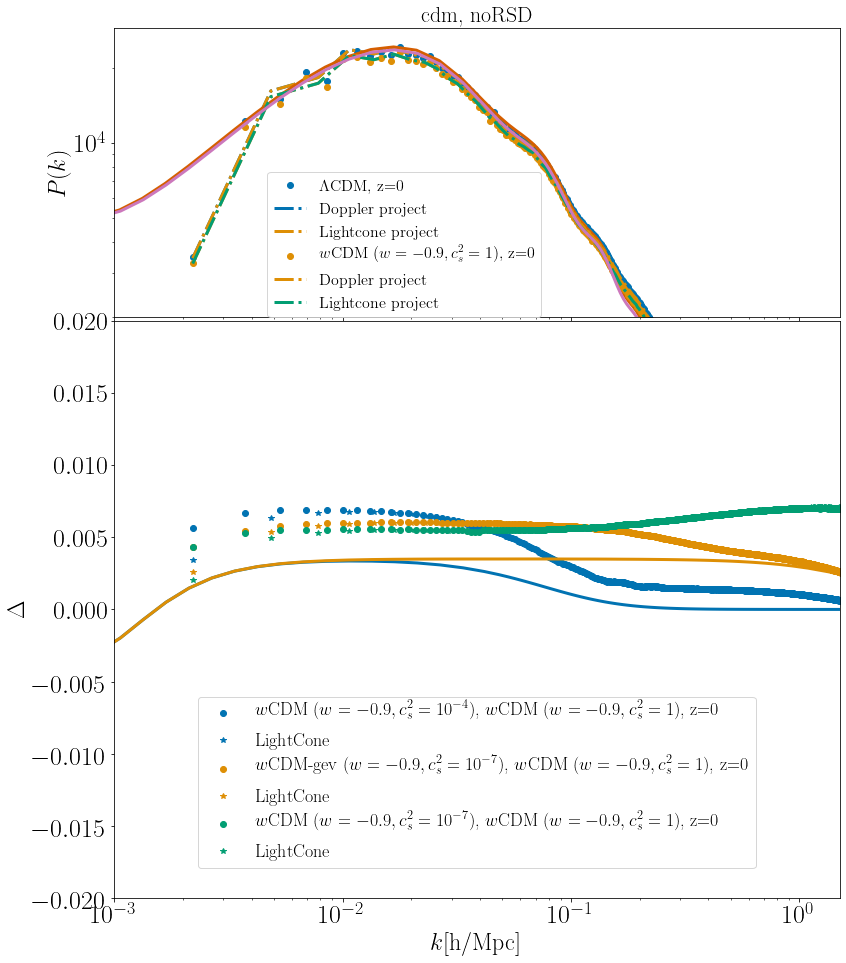

In [101]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'cdm'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','kev_em4','gev_em7','kev_em7'];

files2_lightcone = ['small_lcdm','small_em4','small_em7'];


decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ", "$w$CDM ($w=-0.9, c_s^2=10^{-4}$), ",
          "$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]

files_list_class = ['lcdm','cs2_1','cs2_e4','cs2_e7'];

z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1]: # file
    for j in [0]: # Redshifts
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
        axs[0].loglog(k_w,pk,"o",color =Colors[l], lw=3,label=decrip[i]+z[j])
        
        k_g=pow_gev[file[i]][z[j]][:,0]
        pk_g = pow_gev[file[i]][z[j]][:,1]
        axs[0].loglog(k_g,pk_g*(2.*np.pi**2)/(k_g**3),"-.",color =Colors[l], lw=3,label="Doppler project")
        
        k_g=pow_lightcone[file[i]][z[j]][:,0]
        pk_g = pow_lightcone[file[i]][z[j]][:,1]
        axs[0].loglog(k_g,pk_g*(2.*np.pi**2)/(k_g**3),"-.",color =Colors[l+1], lw=3,label="Lightcone project")
        
#         k_g=pow_lightcone[files2_lightcone[i]][z[j]][:,0]
#         pk_g = pow_lightcone[files2_lightcone[i]][z[j]][:,1]
#         axs[0].loglog(k_g,pk_g*(2.*np.pi**2)/(k_g**3),"-.",color =Colors[l+2], lw=3,label="Small simulation")
        
        k_class = class_data['transfer'][files_list_class[i]][z[j]][:,0]
        pk_class = class_data['transfer'][files_list_class[i]][z[j]][:,3]
        axs[0].loglog(k_class, pk_class**2 *conversion ,"-",color =Colors[l+3], lw=3)
        l=l+1

axs[0].set_ylabel('$P(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
# plt.yscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
axs[0].set_ylim(2.e3,2.9*1.e4)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=16,bbox_to_anchor=(0.60,0.53))
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

l=0
for num1 in [1]: # file 1
    for num2 in [2,3,4]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [k1,pk1]=data[kind][RSD][file[num1]]['pow'][z[j]][[0,1],:]
                [k2,pk2]=data[kind][RSD][file[num2]]['pow'][z[j]][[0,1],:]
                axs[1].plot(k1,(pk2-pk1)/pk1,"o",color =Colors[l], lw=2,label=decrip[num2]+decrip[num1]+" "+z[j])
                
#                 k_g1=pow_gev[file[num1]][z[j]][:,0]
#                 pk_g1 = pow_gev[file[num1]][z[j]][:,1]
#                 pk_g2 = pow_gev[file[num2]][z[j]][:,1]
#                 axs[1].plot(k_g1,(pk_g2-pk_g1)/pk_g1,"-.",color =Colors[l+1], lw=3,label="Doppler project")
                
                k_g1=pow_lightcone[file[num1]][z[j]][:,0]
                pk_g1 = pow_lightcone[file[num1]][z[j]][:,1]
                pk_g2 = pow_lightcone[file[num2]][z[j]][:,1]
                axs[1].plot(k_g1,(pk_g2-pk_g1)/pk_g1,"*",color =Colors[l], lw=3,label="LightCone")
                l=l+1
                
# for num1 in [1]: # file 1
#     for num2 in [2]: # file2
#         for j in [0]: # Redshifts
#             if(num1!=num2):
#                 k_g1=pow_lightcone[files2_lightcone[num1]][z[j]][:,0]
#                 pk_g1 = pow_lightcone[files2_lightcone[num1]][z[j]][:,1]
#                 pk_g2 = pow_lightcone[files2_lightcone[num2]][z[j]][:,1]
#                 axs[1].plot(k_g1,(pk_g2-pk_g1)/pk_g1,"*",color =Colors[l+2], lw=3,label="UNITY sims")
                
#                 l=l+1
l=0
for num1 in [1]: # file 1
    for num2 in [2,3]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):

                k1 = class_data['transfer'][files_list_class[num1]][z[j]][:,0]
                pk1 = class_data['transfer'][files_list_class[num1]][z[j]][:,3]
                pk2 = class_data['transfer'][files_list_class[num2]][z[j]][:,3]
                axs[1].plot(k1,(pk2-pk1)/pk1,"-",color =Colors[l], lw=3)
                l=l+1;


axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(-0.02,0.02)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1])  
axs[1].legend(fontsize=18,bbox_to_anchor=[0.5, 0.2], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


In [ ]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'cdm'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','kev_em4','gev_em7','kev_em7'];

files2_lightcone = ['small_lcdm','small_em4','small_em7'];


decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ", "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$)",
          "$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]

files_list_class = ['lcdm','cs2_1','cs2_e4','cs2_e7'];

z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1,2]: # file
    for j in [0]: # Redshifts
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
        axs[0].loglog(k_w,pk,"o",color =Colors[l], lw=3,label=decrip[i]+z[j])
        
        k_g=pow_gev[file[i]][z[j]][:,0]
        pk_g = pow_gev[file[i]][z[j]][:,1]
        axs[0].loglog(k_g,pk_g*(2.*np.pi**2)/(k_g**3),"-.",color =Colors[l], lw=3,label="Doppler project")
        
        k_g=pow_lightcone[file[i]][z[j]][:,0]
        pk_g = pow_lightcone[file[i]][z[j]][:,1]
        axs[0].loglog(k_g,pk_g*(2.*np.pi**2)/(k_g**3),"-.",color =Colors[l+1], lw=3,label="Lightcone project")
        
        k_g=pow_lightcone[files2_lightcone[i]][z[j]][:,0]
        pk_g = pow_lightcone[files2_lightcone[i]][z[j]][:,1]
        axs[0].loglog(k_g,pk_g*(2.*np.pi**2)/(k_g**3),"-.",color =Colors[l+2], lw=3,label="Small simulation")
        
        k_class = class_data['transfer'][files_list_class[i]][z[j]][:,0]
        pk_class = class_data['transfer'][files_list_class[i]][z[j]][:,3]
        axs[0].loglog(k_class, pk_class**2 *conversion ,"-",color =Colors[l+3], lw=3)
        l=l+1

axs[0].set_ylabel('$P(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
# plt.yscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
axs[0].set_ylim(2.e3,2.9*1.e4)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=16,bbox_to_anchor=(0.60,0.53))
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

l=0
for num1 in [1]: # file 1
    for num2 in [0]: # file2
        for j in [0,2,4]: # Redshifts
            if(num1!=num2):
                [k1,pk1]=data[kind][RSD][file[num1]]['pow'][z[j]][[0,1],:]
                [k2,pk2]=data[kind][RSD][file[num2]]['pow'][z[j]][[0,1],:]
                axs[1].plot(k1,(pk2-pk1)/pk1,"o",color =Colors[l], lw=2,label=decrip[num2]+decrip[num1]+" "+z[j])
                
#                 k_g1=pow_gev[file[num1]][z[j]][:,0]
#                 pk_g1 = pow_gev[file[num1]][z[j]][:,1]
#                 pk_g2 = pow_gev[file[num2]][z[j]][:,1]
#                 axs[1].plot(k_g1,(pk_g2-pk_g1)/pk_g1,"-.",color =Colors[l+1], lw=3,label="Doppler project")
                
                k_g1=pow_lightcone[file[num1]][z[j]][:,0]
                pk_g1 = pow_lightcone[file[num1]][z[j]][:,1]
                pk_g2 = pow_lightcone[file[num2]][z[j]][:,1]
                axs[1].plot(k_g1,(pk_g2-pk_g1)/pk_g1,"-.",color =Colors[l+2], lw=3,label="LightCone")
                
# for num1 in [0]: # file 1
#     for num2 in [0]: # file2
#         for j in [0,2]: # Redshifts
#             if(num1!=num2):
#                 k_g1=pow_lightcone[files2_lightcone[num1]][z[j]][:,0]
#                 pk_g1 = pow_lightcone[files2_lightcone[num1]][z[j]][:,1]
#                 pk_g2 = pow_lightcone[files2_lightcone[num2]][z[j]][:,1]
#                 axs[1].plot(k_g1,(pk_g2-pk_g1)/pk_g1,"*",color =Colors[l+2], lw=3,label="UNITY sims")
                
                l=l+1
l=0
for num1 in [1]: # file 1
    for num2 in [0]: # file2
        for j in [0,2,4]: # Redshifts
            if(num1!=num2):

                k1 = class_data['transfer'][files_list_class[num1]][z[j]][:,0]
                pk1 = class_data['transfer'][files_list_class[num1]][z[j]][:,3]
                pk2 = class_data['transfer'][files_list_class[num2]][z[j]][:,3]
                axs[1].plot(k1,(pk2-pk1)/pk1,"-",color =Colors[l+3], lw=3,label="CLASS")
                l=l+1;


axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(-0.05,0.1)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1])  
axs[1].legend(fontsize=14,bbox_to_anchor=(0.75,0.72))
X=np.arange(0.001,20,1)
axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# cdm Powerspectra comparison, no RSD

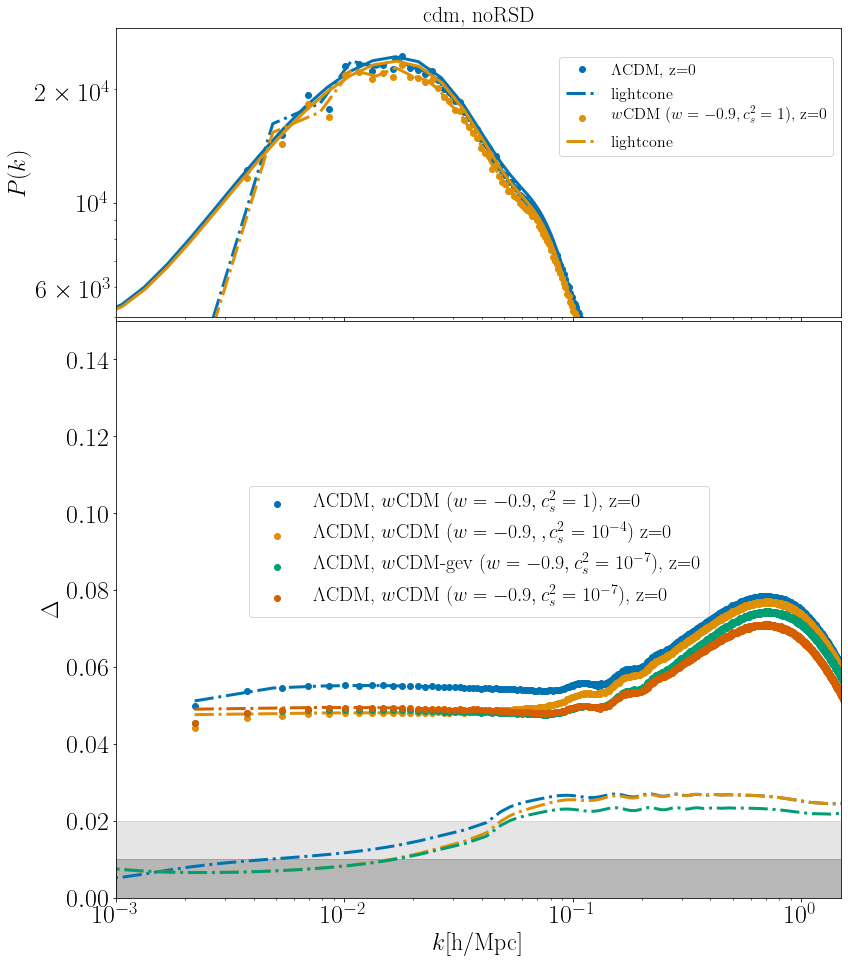

In [73]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'cdm'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','kev_em4','gev_em7','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ", "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$)",
          "$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]

files_list_class = ['lcdm','cs2_1','cs2_e4','cs2_e7'];

z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1]: # file
    for j in [0]: # Redshifts
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
        axs[0].loglog(k_w,pk,"o",color =Colors[l], lw=3,label=decrip[i]+z[j])
        
        k_g=pow_gev[file[i]][z[j]][:,0]
        pk_g = pow_gev[file[i]][z[j]][:,1]
        axs[0].loglog(k_g,pk_g*(2.*np.pi**2)/(k_g**3),"-.",color =Colors[l], lw=3,label="lightcone")
        
        k_class = class_data['transfer'][files_list_class[i]][z[j]][:,0]
        pk_class = class_data['transfer'][files_list_class[i]][z[j]][:,3]
        axs[0].loglog(k_class, pk_class**2 *conversion ,"-",color =Colors[l], lw=3)
        l=l+1

axs[0].set_ylabel('$P(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
# plt.yscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
axs[0].set_ylim(5.e3,2.9*1.e4)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=16,bbox_to_anchor=(0.60,0.53))
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [0]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [k1,pk1]=data[kind][RSD][file[num1]]['pow'][z[j]][[0,1],:]
                [k2,pk2]=data[kind][RSD][file[num2]]['pow'][z[j]][[0,1],:]
                axs[1].plot(k1,(pk2-pk1)/pk1,"o",color =Colors[l], lw=2,label=decrip[num2]+decrip[num1]+" "+z[j])
                
                k_g1=pow_lightcone[file[num1]][z[j]][:,0]
                pk_g1 = pow_lightcone[file[num1]][z[j]][:,1]
                pk_g2 = pow_lightcone[file[num2]][z[j]][:,1]
                axs[1].plot(k_g1,(pk_g2-pk_g1)/pk_g1,"-.",color =Colors[l], lw=3)
                
                l=l+1
l=0
for num1 in [0,1,2,3]: # file 1
    for num2 in [0]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):

                k1 = class_data['transfer'][files_list_class[num1]][z[j]][:,0]
                pk1 = class_data['transfer'][files_list_class[num1]][z[j]][:,3]
                pk2 = class_data['transfer'][files_list_class[num2]][z[j]][:,3]
                axs[1].plot(k1,(pk2-pk1)/pk1,"-.",color =Colors[l], lw=3)
                l=l+1;


axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(0.0,0.15)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1])  
axs[1].legend(fontsize=20,bbox_to_anchor=[0.5, 0.6], loc='center')
X=np.arange(0.001,20,1)
axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


In [ ]:
files_list_class[4]

# Halo Powerspectra comparison,  no RSD

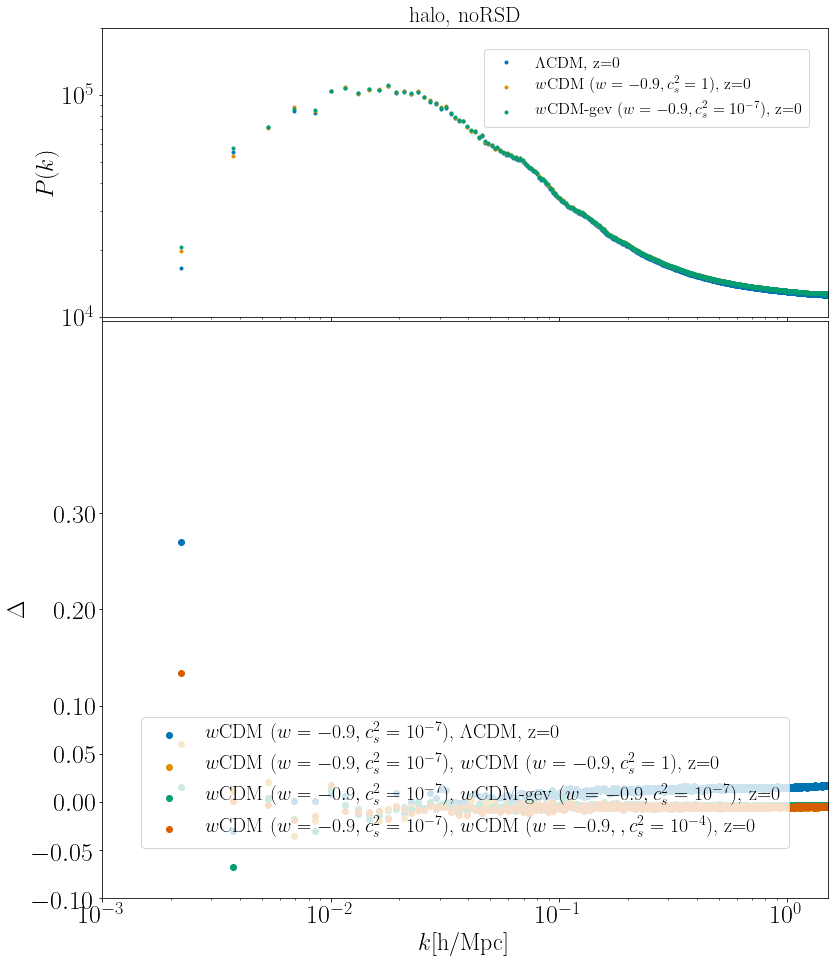

In [74]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'halo'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1,2]: # file
    for j in [0]: # Redshifts
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
        axs[0].loglog(k_w,pk,".",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel('$P(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
# plt.yscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
axs[0].set_ylim(1.e4,2.e5)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=16,bbox_to_anchor=(0.75,0.63))
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [4]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [k1,pk1]=data[kind][RSD][file[num1]]['pow'][z[j]][[0,1],:]
                [k2,pk2]=data[kind][RSD][file[num2]]['pow'][z[j]][[0,1],:]
                axs[1].plot(k1,(pk2-pk1)/pk1,"o",color =Colors[l], lw=3,label=decrip[num2]+decrip[num1]+" "+z[j])
                l=l+1;

axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(-0.1,0.5)
axs[1].set_xlim(1.e-3,1.5)
axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=20,bbox_to_anchor=[0.5, 0.2], loc='center')
X=np.arange(0.001,20,1)
axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# cdm Powerspectra comparison,  RSD

In [ ]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'cdm'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1,2]: # file
    for j in [0]: # Redshifts
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,2],:]  
        axs[0].plot(k_w,pk,".",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel('$P(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
plt.xscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
# axs[0].set_ylim(1.,6.e4)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.5, 0.2], loc='center')
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [4]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [k1,pk1]=data[kind][RSD][file[num1]]['pow'][z[j]][[0,2],:]
                [k2,pk2]=data[kind][RSD][file[num2]]['pow'][z[j]][[0,2],:]
                axs[1].plot(k1,(pk2-pk1)/(0.5*(pk1+pk2)),"o",color =Colors[l], lw=3,label=decrip[num2]+decrip[num1]+" "+z[j])
                l=l+1;

axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(-1,1)
axs[1].set_xlim(1.e-3,1.5)
axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.2], loc='center')
X=np.arange(0.001,20,1)
axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# cdm power RSD and no-RSD

In [ ]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,1.5]})
plt.subplots_adjust(hspace=0.01)



kind = 'cdm'
RSD ='RSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,2]: # file
    for j in [0]: # Redshifts
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
        axs[0].loglog(k_w,pk,"-.",color =Colors[l], lw=3,label=decrip[i]+z[j]+", "+RSD)
        l=l+1

kind = 'cdm'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

for i in [0,2]: # file
    for j in [0]: # Redshifts
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
        axs[0].loglog(k_w,pk,"-.",color =Colors[l], lw=3,label=decrip[i]+z[j]+", "+RSD)
        l=l+1

axs[0].set_ylabel('$P(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
# plt.yscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
axs[0].set_ylim(2.e3,6.e4)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.5, 0.2], loc='center')
axs[0].set_title(kind, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for j in [0]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j])
            l=l+1;

axs[1].set_ylabel('$P_{RSD}/P_{no-RSD}$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('log')
axs[1].set_ylim(0.2,2.5)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.2], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Halo Powerspectra comparison,  RSD

In [ ]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'halo'
RSD ='RSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1,2]: # file
    for j in [0,1]: # Redshifts
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
        axs[0].loglog(k_w,pk,".",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel('$P(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
# plt.yscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
axs[0].set_ylim(1.e4,2.e5)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.5, 0.2], loc='center')
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [4]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [k1,pk1]=data[kind][RSD][file[num1]]['pow'][z[j]][[0,1],:]
                [k2,pk2]=data[kind][RSD][file[num2]]['pow'][z[j]][[0,1],:]
                axs[1].plot(k1,(pk2-pk1)/pk1,"o",color =Colors[l], lw=3,label=decrip[num2]+decrip[num1]+" "+z[j])
                l=l+1;

axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(-0.4,0.35)
axs[1].set_xlim(1.e-3,1.5)
axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.2], loc='center')
X=np.arange(0.001,20,1)
axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Halo power RSD and no-RSD

In [ ]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,1.5]})
plt.subplots_adjust(hspace=0.01)



kind = 'halo'
RSD ='RSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,2]: # file
    for j in [0]: # Redshifts
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
        axs[0].loglog(k_w,pk,"-.",color =Colors[l], lw=3,label=decrip[i]+z[j]+", "+RSD)
        l=l+1

RSD ='noRSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

for i in [0,2]: # file
    for j in [0]: # Redshifts
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
        axs[0].loglog(k_w,pk,"-.",color =Colors[l], lw=3,label=decrip[i]+z[j]+", "+RSD)
        l=l+1

axs[0].set_ylabel('$P(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
# plt.yscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
axs[0].set_ylim(9.e3,2.e5)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.5, 0.2], loc='center')
axs[0].set_title(kind, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for j in [0]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j])
            l=l+1;

axs[1].set_ylabel('$P_{RSD}/P_{no-RSD}$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
plt.yscale('log')
axs[1].set_ylim(0.9,1.5)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.2], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Halo vs cdm, RSD and noRSD

In [ ]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0,1]})
plt.subplots_adjust(hspace=0.0)



kind = 'halo'
RSD ='RSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
# for i in [0,2]: # file
#     for j in [0]: # Redshifts
#         [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
#         axs[0].loglog(k_w,pk,"-.",color =Colors[l], lw=3,label=decrip[i]+z[j]+", "+RSD)
#         l=l+1

# RSD ='noRSD'
# file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
# decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
#           "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
# z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

# for i in [0,2]: # file
#     for j in [0]: # Redshifts
#         [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
#         axs[0].loglog(k_w,pk,"-.",color =Colors[l], lw=3,label=decrip[i]+z[j]+", "+RSD)
#         l=l+1

# axs[0].set_ylabel('$P(k)$',fontsize=24)
# axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
# # plt.yscale('log')
# # axs[0].xticks(size = 25);
# # axs[0].yticks(size = 25);
# axs[0].set_ylim(9.e3,2.e5)
# axs[0].set_xlim(1.e-3,2.e0)
# axs[0].legend(fontsize=22,bbox_to_anchor=[0.5, 0.2], loc='center')
# axs[0].set_title(kind, fontsize=22)
# # Relative difference:

kind = "cdm"
l=0
for num1 in [0,1,2]: # file 1
    for j in [0]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=kind+", "+decrip[num1]+" "+z[j])
            l=l+1;
kind = 'halo'
for num1 in [0,1,2]: # file 1
    for j in [0]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=kind+", "+decrip[num1]+" "+z[j])
            l=l+1;

axs[1].set_ylabel('$P_{RSD}/P_{no-RSD}$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('log')
axs[1].set_ylim(0.2,3.5)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.8], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Halo vs cdm, RSD and noRSD redshift evolution

In [ ]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0,1]})
plt.subplots_adjust(hspace=0.0)



kind = 'halo'
RSD ='RSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0

kind = "cdm"
l=0
for num1 in [1]: # file 1
    for j in [0,1,2,4]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=kind+", "+decrip[num1]+" "+z[j])
            l=l+1;
kind = 'halo'
for num1 in [1]: # file 1
    for j in [0,1,2,4]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=kind+", "+decrip[num1]+" "+z[j])
            l=l+1;

axs[1].set_ylabel('$P_{RSD}/P_{no-RSD}$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('log')
axs[1].set_ylim(0.2,3.5)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.78], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


In [ ]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0,1]})
plt.subplots_adjust(hspace=0.0)



kind = 'halo'
RSD ='RSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0

kind = "cdm"
l=0
for num1 in [0]: # file 1
    for j in [0,1,2,4]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=kind+", "+decrip[num1]+" "+z[j])
            l=l+1;
kind = 'halo'
for num1 in [0]: # file 1
    for j in [0,1,2,4]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=kind+", "+decrip[num1]+" "+z[j])
            l=l+1;

axs[1].set_ylabel('$P_{RSD}/P_{no-RSD}$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('log')
axs[1].set_ylim(0.2,3.5)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.78], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Halo over cdm power spectrum

In [ ]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0,1]})
plt.subplots_adjust(hspace=0.0)



kind = 'halo'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0

kind1 = "cdm"
kind2 = "halo"
l=0
for num1 in [1]: # file 1
    for j in [0,1,2,4]: # Redshifts
            [k1,pk1]=data[kind1]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind2]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j])
            l=l+1;
for num1 in [0]: # file 1
    for j in [0]: # Redshifts
            [k1,pk1]=data[kind1]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind2]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j])
            l=l+1;
axs[1].set_title(RSD, fontsize=22)
axs[1].set_ylabel('$P_{hh}/P_{cdm}$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
plt.yscale('log')
# axs[1].set_ylim(0.2,3.5)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.78], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Correlation function cdm, no RSD

In [ ]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'cdm'
RSD ='noRSD'
file_type = 'cor'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1,2]: # file
    for j in [0]: # Redshifts
        [r,zeta]=data[kind][RSD][file[i]][file_type][z[j]][[0,1],:]  
        axs[0].plot(r,zeta*r**2,"o",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel('$r^2 \zeta(r)$',fontsize=28)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_xscale('log')
axs[0].set_ylim(-10,50)
# axs[0].set_xlim(1.e-2,500)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.3, 0.2], loc='center')
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [4]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [r1,zeta1]=data[kind][RSD][file[num1]][file_type][z[j]][[0,1],:]
                [r2,zsta2]=data[kind][RSD][file[num2]][file_type][z[j]][[0,1],:]
                axs[1].plot(k1,(zsta2-zeta1)/zeta1,"o",color =Colors[l], lw=3,label=decrip[num2]+decrip[num1]+" "+z[j])
                l=l+1;

axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$r$[Mpc/h]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(-0.1,0.1)
axs[1].set_xlim(2,1000)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.8], loc='center')
X=np.arange(0.001,2000,20)
axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Correlation function cdm, RSD

In [ ]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'cdm'
RSD ='RSD'
file_type = 'cor'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1,2]: # file
    for j in [0]: # Redshifts
        [r,zeta]=data[kind][RSD][file[i]][file_type][z[j]][[0,1],:]  
        axs[0].plot(r,zeta*r**2,"o",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel('$r^2 \zeta(r)$',fontsize=28)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_xscale('log')
axs[0].set_ylim(-8.e1,1.e2)
# axs[0].set_xlim(1.e-2,500)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.5, 0.2], loc='center')
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [4]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [r1,zeta1]=data[kind][RSD][file[num1]][file_type][z[j]][[0,1],:]
                [r2,zsta2]=data[kind][RSD][file[num2]][file_type][z[j]][[0,1],:]
                axs[1].plot(k1,(zsta2-zeta1)/zeta1,"o",color =Colors[l], lw=3,label=decrip[num2]+decrip[num1]+" "+z[j])
                l=l+1;

axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$r$[Mpc/h]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(-0.2,0.5)
axs[1].set_xlim(2,1000)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.87], loc='center')
X=np.arange(0.001,2000,20)
axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Halo  Correlation function, noRSD

In [ ]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'halo'
RSD ='noRSD'
file_type = 'cor'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1,2]: # file
    for j in [0]: # Redshifts
        [r,zeta]=data[kind][RSD][file[i]][file_type][z[j]][[0,1],:]  
        axs[0].plot(r,zeta*r**2,"-o",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel('$r^2 \zeta(r)$',fontsize=28)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_xscale('log')
axs[0].set_ylim(-100,400)
# axs[0].set_xlim(1.e-2,500)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.7, 0.8], loc='center')
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [4]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [r1,zeta1]=data[kind][RSD][file[num1]][file_type][z[j]][[0,1],:]
                [r2,zsta2]=data[kind][RSD][file[num2]][file_type][z[j]][[0,1],:]
                axs[1].plot(r1,(zsta2-zeta1)/zeta1,"o",color =Colors[l], lw=3,label=decrip[num2]+decrip[num1]+" "+z[j])
                l=l+1;

axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$r$[Mpc/h]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(-0.1,0.1)
axs[1].set_xlim(2,1000)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.8], loc='center')
X=np.arange(0.001,2000,20)
axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Halo  Correlation function, RSD

In [ ]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'halo'
RSD ='RSD'
file_type = 'cor'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1,2]: # file
    for j in [0]: # Redshifts
        [r,zeta]=data[kind][RSD][file[i]][file_type][z[j]][[0,1],:]  
        axs[0].plot(r,zeta*r**2,"-o",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel('$r^2 \zeta(r)$',fontsize=28)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_xscale('log')
axs[0].set_ylim(-100,400)
# axs[0].set_xlim(1.e-2,500)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.7, 0.8], loc='center')
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [4]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [r1,zeta1]=data[kind][RSD][file[num1]][file_type][z[j]][[0,1],:]
                [r2,zsta2]=data[kind][RSD][file[num2]][file_type][z[j]][[0,1],:]
                axs[1].plot(r1,(zsta2-zeta1)/zeta1,"o",color =Colors[l], lw=3,label=decrip[num2]+decrip[num1]+" "+z[j])
                l=l+1;

axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$r$[Mpc/h]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(-0.1,0.1)
axs[1].set_xlim(2,300)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.8], loc='center')
X=np.arange(0.001,2000,20)
axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# correlation function RSD, noRSD comparison

In [ ]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0,1]})
plt.subplots_adjust(hspace=0.0)



kind = 'halo'
file_type = 'cor'
RSD ='RSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0

kind = "cdm"
l=0
for num1 in [0,2]: # file 1
    for j in [0]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]][file_type][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]][file_type][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"-o",color =Colors[l], lw=3,label=kind+", "+decrip[num1]+" "+z[j])
            l=l+1;
kind = 'halo'
for num1 in [0,2]: # file 1
    for j in [0]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]][file_type][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]][file_type][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"-o",color =Colors[l], lw=3,label=kind+", "+decrip[num1]+" "+z[j])
            l=l+1;

axs[1].set_ylabel('$\zeta_{RSD}/\zeta_{no-RSD}$',fontsize=24)
axs[1].set_xlabel('$r$[Mpc/h]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('log')
axs[1].set_ylim(0,2.7)
axs[1].set_xlim(2,200)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.18], loc='center')
# X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# quadrupole moment RSD, noRSD, halo

In [ ]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'halo'
RSD ='RSD'
file_type = 'cor'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1,2]: # file
    for j in [0]: # Redshifts
        [r,zeta]=data[kind][RSD][file[i]][file_type][z[j]][[0,2],:]  
        axs[0].plot(r,zeta*r**2,"-o",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1
        
for i in [0]: # file
    for j in [0]: # Redshifts
        [r,zeta]=data[kind]['noRSD'][file[i]][file_type][z[j]][[0,2],:]  
        axs[0].plot(r,zeta*r**2,"-o",color =Colors[l], lw=3,label="noRSD, "+decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel('$r^2 \zeta^{quad}(r)$',fontsize=28)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_xscale('log')
axs[0].set_ylim(-100,100)
# axs[0].set_xlim(1.e-2,500)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.7, 0.8], loc='center')
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [4]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [r1,zeta1]=data[kind][RSD][file[num1]][file_type][z[j]][[0,2],:]
                [r2,zsta2]=data[kind][RSD][file[num2]][file_type][z[j]][[0,2],:]
                axs[1].plot(r1,(zsta2-zeta1)/zeta1,"o",color =Colors[l], lw=3,label=decrip[num2]+decrip[num1]+" "+z[j])
                l=l+1;

axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$r$[Mpc/h]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(-0.1,0.13)
axs[1].set_xlim(2,300)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.8], loc='center')
X=np.arange(0.001,2000,20)
axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# quadrupole moment RSD, noRSD, cdm

In [ ]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'cdm'
RSD ='RSD'
file_type = 'cor'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1,2]: # file
    for j in [0]: # Redshifts
        [r,zeta]=data[kind][RSD][file[i]][file_type][z[j]][[0,2],:]  
        axs[0].plot(r,zeta*r**2,"-o",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1
        
for i in [0]: # file
    for j in [0]: # Redshifts
        [r,zeta]=data[kind]['noRSD'][file[i]][file_type][z[j]][[0,2],:]  
        axs[0].plot(r,zeta*r**2,"-o",color =Colors[l], lw=3,label="noRSD, "+decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel('$r^2 \zeta^{quad}(r)$',fontsize=28)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_xscale('log')
axs[0].set_ylim(-120,150)
# axs[0].set_xlim(1.e-2,500)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.7, 0.76], loc='center')
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [4]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [r1,zeta1]=data[kind][RSD][file[num1]][file_type][z[j]][[0,2],:]
                [r2,zsta2]=data[kind][RSD][file[num2]][file_type][z[j]][[0,2],:]
                axs[1].plot(r1,(zsta2-zeta1)/zeta1,"o",color =Colors[l], lw=3,label=decrip[num2]+decrip[num1]+" "+z[j])
                l=l+1;

axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$r$[Mpc/h]',fontsize=24)
axs[1].set_xscale('log')
plt.yscale('symlog')
axs[1].set_ylim(-1,1)
axs[1].set_xlim(2,300)
axs[1].set_yticks([-0.5,-0.05,0,0.05,0.5,1])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.8], loc='center')
X=np.arange(0.001,2000,20)
axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)
